<a href="https://colab.research.google.com/github/weasel-codes/google-colab/blob/main/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Goal**
To predict whether a customer will by an SUV or not

Using only Two features : to get clear 2D dimensions

# **Importing Libraries**

In [3]:
import numpy as np
import matplotlib.pyplot as plot
import pandas as pd

# **Importing Datasets**

In [4]:
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, :-1].values 
Y = dataset.iloc[:,-1] 

# **Splitting into Training and Test Set**

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0) #75-25 ratio

# **Feature Scaling**

In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train) #Not for Purchased
X_test = sc.transform(X_test)

# **Training Logistic Regression Model**
* Training is done on training set
* Fit created the object on training set

In [7]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# **Predicting Test Result**

In [8]:
classifier.predict([X_test[0,:]]) # we need a 2D input

array([0])

# **Predicting Test Set Result**
Try predicting test set result vector and actual vector of prediction next to each other

In [ ]:
Y_pred = classifier.predict(X_test)
np.concatenate((Y_pred.reshape(len(Y_pred),1), np.array(Y_test).reshape(len(np.array(Y_test)),1)),1)

# **Making Confusion Matrix**
Confusion matrix will show us no. of exact correct and incorrect predictions.


In [10]:
from sklearn.metrics import confusion_matrix, accuracy_score
Y_true = np.array(Y_test)
cm = confusion_matrix(Y_true, Y_pred) ##correct bought, incorrect bought, corerct not bought, incorrect not bought

accuracy_score(Y_true, Y_pred)

0.89

# **Visualizing Training Set Result**
Plot on a 2-D plot

x-axis : 1st feature

y-axis : 2nd feature

Code for printing is not that useful... just copy it

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


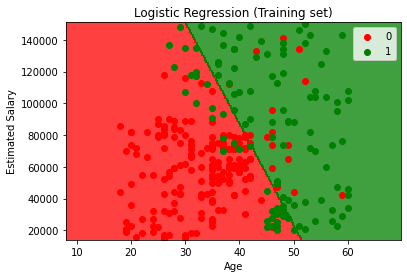

In [11]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
X_set, Y_set = sc.inverse_transform(X_train), Y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()